In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing 
import io
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler
import keras
from keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
import glob
import os
from keras.models import load_model
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [0]:
#df2 = pd.read_csv('/content/drive/Shared drives/Dataset/csh101.ann.features.csv')
path = r'/content/drive/Shared drives/Dataset/train/'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
df2 = pd.concat(df_from_each_file, ignore_index=True)

In [0]:
#df2 = pd.read_csv('/content/drive/Shared drives/Dataset/csh101.ann.features.csv')
path = r'/content/drive/Shared drives/Dataset/test/'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
df2_test = pd.concat(df_from_each_file, ignore_index=True)

ValueError: ignored

In [0]:
df2.shape

(13956557, 37)

In [0]:
df2_test.shape

In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13956557 entries, 0 to 13956556
Data columns (total 37 columns):
lastSensorEventHours        float64
lastSensorEventSeconds      float64
lastSensorDayOfWeek         float64
windowDuration              float64
timeSinceLastSensorEvent    float64
prevDominantSensor1         float64
prevDominantSensor2         float64
lastSensorID                float64
lastSensorLocation          float64
lastMotionLocation          float64
complexity                  float64
activityChange              float64
areaTransitions             float64
numDistinctSensors          float64
sensorCount-Bathroom        float64
sensorCount-Bedroom         float64
sensorCount-Chair           float64
sensorCount-DiningRoom      float64
sensorCount-Hall            float64
sensorCount-Ignore          float64
sensorCount-Kitchen         float64
sensorCount-LivingRoom      float64
sensorCount-Office          float64
sensorCount-OutsideDoor     float64
sensorCount-WorkArea 

In [0]:
df2['activity'].value_counts()

Other_Activity           4769983
Entertain_Guests         1274082
Personal_Hygiene          951348
Cook_Breakfast            615700
Watch_TV                  596557
Sleep                     567859
Work_On_Computer          551722
Dress                     505630
Groom                     394545
Cook_Dinner               375098
Toilet                    363076
Wash_Dishes               331122
Cook                      229721
Cook_Lunch                207064
Drink                     200186
Wash_Breakfast_Dishes     193492
Work                      167661
Read                      152346
Phone                     135860
Bathe                     134638
Relax                     127448
Work_At_Table             124794
Wash_Dinner_Dishes        124157
Leave_Home                107172
Enter_Home                100394
Eat_Breakfast              98642
Bed_Toilet_Transition      81656
Morning_Meds               67972
Sleep_Out_Of_Bed           67839
Wash_Lunch_Dishes          59161
Evening_Me

In [0]:
df2[df2['activity']=='r1.Sleep']

In [0]:
df2['lastSensorDayOfWeek'].unique()

array([4., 5., 6., 0., 1., 2., 3.])

In [0]:
label_encoder = preprocessing.LabelEncoder()
df2['activity']

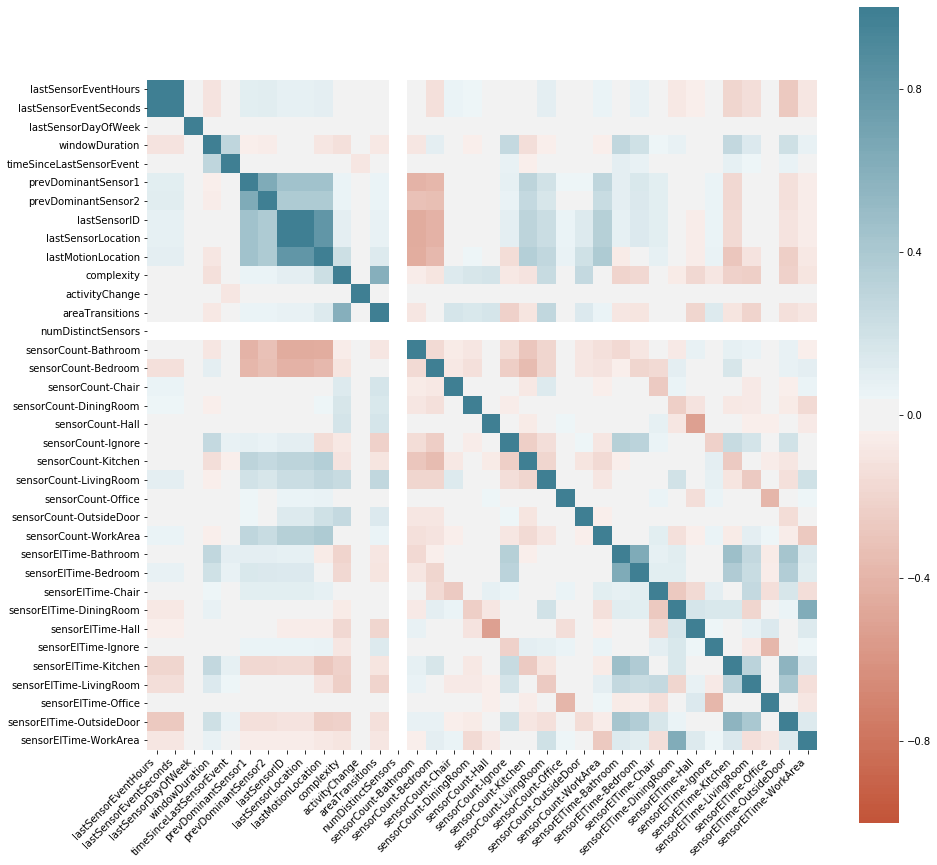

In [0]:
corr = df2.corr()
fig, ax = plt.subplots(figsize=(15,15))  
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
df2.nunique()
df2[df2['numDistinctSensors']==1].head()
# Check for null values in the dataset
df2.isnull().sum()
df2.isna().sum()

In [0]:
#Check for any duplicate values
df2.duplicated()

In [0]:
#Dropping the correlated and irrelevant attributes
#lastSensorEventSeconds,lastSensorID,lastMotionLocation,numDistinctSensors
df2=df2.drop(columns=['lastSensorEventSeconds','lastSensorID','lastMotionLocation','numDistinctSensors'])

In [0]:
#lastSensorEventSeconds,lastSensorID,lastMotionLocation,numDistinctSensors
df2_test=df2_test.drop(columns=['lastSensorEventSeconds','lastSensorID','lastMotionLocation','numDistinctSensors'])

In [0]:
#Dropping rows with irrelevant values
df2=df2[df2['activity']!='r1.Sleep']
df2=df2[df2['activity']!='r2.Personal_Hygiene']
df2=df2[df2['activity']!= 'r1.Cook_Breakfast']
df2=df2[df2['activity']!= 'r2.Eat_Breakfast']
df2=df2[df2['activity']!= 'r2.Dress']

In [0]:
#Dropping rows with irrelevant values
df2_test=df2_test[df2_test['activity']!='r1.Sleep']
df2_test=df2_test[df2_test['activity']!='r2.Personal_Hygiene']
df2_test=df2_test[df2_test['activity']!= 'r1.Cook_Breakfast']
df2_test=df2_test[df2_test['activity']!= 'r2.Eat_Breakfast']
df2_test=df2_test[df2_test['activity']!= 'r2.Dress']

In [0]:
#Separating the label from the data
Y = df2['activity']
np.unique(Y)
Y = label_encoder.fit_transform(Y)
Y = Y.reshape(Y.shape[0],1)
np.unique(Y)

In [0]:
df2.shape
X = df2[df2.columns[:-1]]
X.shape

In [0]:
#Scaling the data
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X
###validation split
X, valX, Y, valY = train_test_split(X, Y, test_size=0.2, random_state = 0)
X.shape

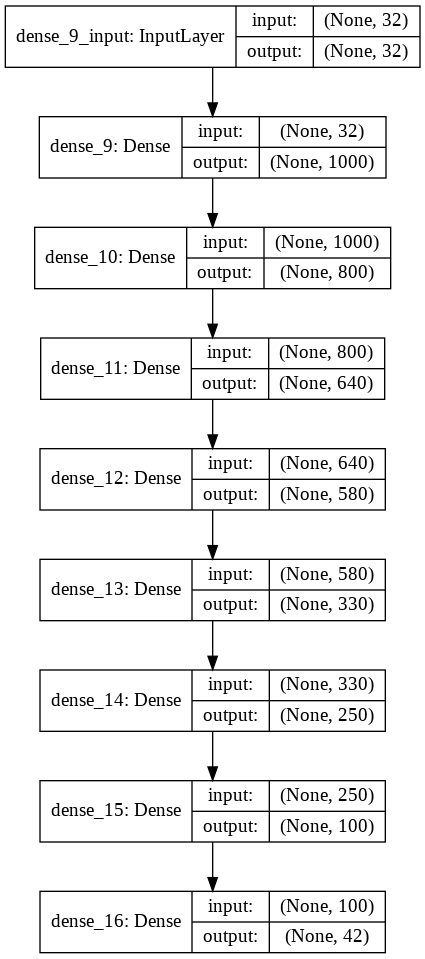

In [0]:
model = keras.Sequential([
    keras.layers.Dense(1000, activation='relu',input_dim=32),
    keras.layers.Dense(800, activation='relu'),
    keras.layers.Dense(640, activation='relu'),
    keras.layers.Dense(580, activation='relu'),
    keras.layers.Dense(330, activation='relu'),
    keras.layers.Dense(250, activation='relu'), 
    keras.layers.Dense(100, activation='relu'),    
    keras.layers.Dense(42, activation='softmax')
    
])


model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

with tf.device('/device:GPU:0'):
  history=model.fit(X, Y, epochs=40, validation_data=(valX,valY),batch_size=1024)
  #,callbacks=[es,tensorboard_callback]


In [0]:
################################## Graph for Train and Validation #############################################
print("Train vs Validation Performance measure")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist['epoch'], hist['acc'],
         label='Train Accuracy')
plt.plot(hist['epoch'], hist['val_acc'],
         label = 'Val Accuracy')
plt.plot(hist['epoch'], hist['loss'],
         label='Train Loss')
plt.plot(hist['epoch'], hist['val_loss'],
         label = 'Val Loss')
plt.legend()

In [0]:
pred=model.predict_classes(valX,verbose=0)
tl=valY
acc=metrics.accuracy_score(tl,pred)
print(acc)
precision=metrics.precision_score(tl,pred,average='weighted')
print(precision)
recall=metrics.recall_score(tl,pred,average='weighted')
print(recall)
f1=f1_score(tl,pred,average='weighted')
print(f1)

In [0]:
model.save('/content/drive/Shared drives/Dataset/MLNeuralNetwork.h5')

In [0]:
log_reg = keras.Sequential([
      keras.layers.Dense(42, activation='softmax')                    
])
log_reg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=log_reg.fit(X, Y, epochs=40, validation_data=(valX,valY),batch_size=1024)

In [0]:
################################## Graph #############################################
print("Logistic Regression")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist['epoch'], hist['acc'],
         label='Train Accuracy')
plt.plot(hist['epoch'], hist['val_acc'],
         label = 'Val Accuracy')
plt.plot(hist['epoch'], hist['loss'],
         label='Train Loss')
plt.plot(hist['epoch'], hist['val_loss'],
         label = 'Val Loss')
plt.legend()

In [0]:
#Logistic Regression
pred=log_reg.predict_classes(valX,verbose=0)
tl=valY
acc=metrics.accuracy_score(tl,pred)
print(acc)
precision=metrics.precision_score(tl,pred,average='micro')
print(precision)
recall=metrics.recall_score(tl,pred,average='micro')
print(recall)
f1=f1_score(tl,pred,average='weighted')
print(f1)

In [0]:
model.save('/content/drive/Shared drives/Dataset/ML_Logistic.h5')

In [0]:
#----------------------Testing the model with Test data--------------------------------------------------

In [0]:
#Separating the label from the data
Y_test = df2_test['activity']
np.unique(Y)
Y_test = label_encoder.fit_transform(Y_test)
Y_test = Y_test.reshape(Y_test.shape[0],1)
np.unique(Y_test)

In [0]:
df2_test.shape
X_test = df2_test[df2_test.columns[:-1]]
X_test.shape

In [0]:
X_test = transformer.transform(X_test)

In [0]:
model_final=tf.keras.models.load_model('/content/drive/Shared drives/Dataset/MLNeuralNetwork.h5')
score = model_final.evaluate(X, Y, batch_size=1024)

In [0]:
tf.keras.utils.plot_model(model,to_file='/content/drive/Shared drives/Dataset/model.png',show_shapes=True)